# Taylor approximations

In this basic example we are going to build a local approximation of a model using the taylor decomposition:

Here is the decomposition at the first order:

$$\underline{y} \, \approx \, \widehat{h}(\underline{x}) \,
      = \, h(\underline{x}_0) \, +
        \, \sum_{i=1}^{n_{X}} \; \frac{\partial h}{\partial x_i}(\underline{x}_0).\left(x_i - x_{0,i} \right)$$
        
        
Here

$$h(x) = [cos(x_1 + x_2), (x2 + 1)* e^{x_1 - 2* x_2}]$$


In [22]:
from __future__ import print_function
import openturns as ot

# prepare some data
formulas = ['cos(x1 + x2)', '(x2 + 1) * exp(x1 - 2 * x2)']
model = ot.SymbolicFunction(['x1', 'x2'], formulas)

# center of the approximation
x0 = [-0.4, -0.4]

# drawing bounds
a=-0.4
b=0.0

In [23]:
# create a linear (first order) Taylor approximation
algo = ot.LinearTaylor(x0, model)
algo.run()
responseSurface = algo.getMetaModel()

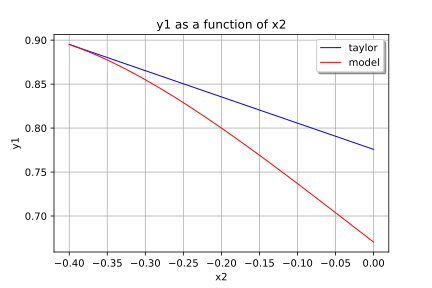

In [24]:
# plot 2nd output of our model with x1=x0_1
graph = ot.ParametricFunction(responseSurface, [0], [x0[1]]).getMarginal(1).draw(a, b)
graph.setLegends(['taylor'])
curve = ot.ParametricFunction(model, [0], [x0[1]]).getMarginal(1).draw(a, b).getDrawable(0)
curve.setColor('red')
curve.setLegend('model')
graph.add(curve)
graph.setLegendPosition('topright')
graph

Here is the decomposition at the second order:

$$\underline{y} \, \approx \, \widehat{h}(\underline{x}) \, = \,                                                                                                                                                                                    
     h(\underline{x}_0) \, + \, \sum_{i=1}^{n_{X}} \;                                                                                                                                                                                            
      \frac{\partial h}{\partial x_i}(\underline{x}_0).\left(x_i - x_{0,i} \right) \, +                                                                                                                                                          
     \, \frac{1}{2} \; \sum_{i,j=1}^{n_X} \;                                                                                                                                                                                                
      \frac{\partial^2 h}{\partial x_i \partial x_j}(\underline{x}_0).\left(x_i - x_{0,i} \right).\left(x_j - x_{0,j} \right)$$

In [25]:
# create a quadratic (2nd order) Taylor approximation
algo = ot.QuadraticTaylor(x0, model)
algo.run()
responseSurface = algo.getMetaModel()

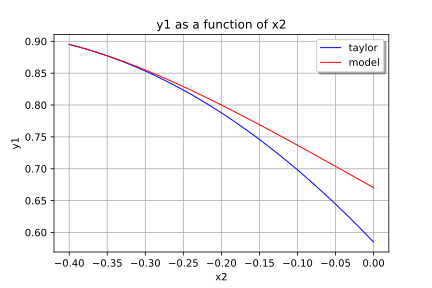

In [26]:
# plot 2nd output of our model with x1=x0_1
graph = ot.ParametricFunction(responseSurface, [0], [x0[1]]).getMarginal(1).draw(a, b)
graph.setLegends(['taylor'])
curve = ot.ParametricFunction(model, [0], [x0[1]]).getMarginal(1).draw(a, b).getDrawable(0)
curve.setColor('red')
curve.setLegend('model')
graph.add(curve)
graph.setLegendPosition('topright')
graph